# 1. Compute and Plot the Planck Function

### $B_{\nu}(T) = \frac{2h\nu^3}{c^2}\frac{1}{\frac{h\nu}{ek_BT}-1}$

Must grab the function from our own module and compare it to astropy. We will also use wavenumbers, $\tilde{\nu}=1/\lambda$ [microns].

a) We must write our own Planck function that accepts vector input and in understandable units. This must be compareable to a library Planck function.

b) We must make 3 plots: $B_{\nu}$ vs $\tilde{\nu}$ (0, 12 $\mu m^{-1}$), log$B_{\nu}$ vs $\tilde{\nu}$ on the same range, log$B_{\nu}$ vs log$\tilde{\nu}$ (-1.0 < log$\tilde{\nu}$ < 1.2). 

*for y vs logx, plot the x-axis with logarithmically spaced ticks instead of evenly spaced points

c) For each plot for part (b), include curves for T=10000 K, 7000 K, and 3000 K. Include a legend.

### New Planck Function: $B_{\tilde{\nu}}(T)=2hc\tilde{\nu}^3/(e^{\frac{hc\tilde{\nu}}{kT}}-1)$ as $\nu = c/\lambda=c\tilde{\nu}$

In [1]:
from importlib import reload
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from astropy.units.equivalencies import spectral

import numpy as np
import matplotlib.pyplot as plt

from pkg import astro530

In [2]:
astro530 = reload(astro530)

In [3]:
plk = astro530.Planck([1,2,3,4,5],7000)
plk

<Quantity [5.83397159e-05, 5.29763481e-05, 2.25653623e-05, 6.83621461e-06,
           1.70921614e-06] erg / (cm2 Hz s sr)>

In [4]:
bb = BlackBody(7000*u.K)

In [5]:
(1*u.um**-1).to(u.AA, equivalencies=u.spectral())

<Quantity 10000. Angstrom>

In [6]:
T_list = [10000,7000,3000]*u.K
wn_1 = np.linspace(0,12,num=200)/u.um
wn_2 = np.linspace(0,12,num=200)/u.um
wn_3 = np.logspace(-1,1.2,200)/u.um

In [7]:
#astro530.Planck(wn_1*u.um,7000)

In [8]:
#bb((wn_1).to(u.um, equivalencies=spectral()))

In [9]:
str(T_list[1])

'7000.0 K'

In [10]:
"%.0f"%(T_list[1].value)

'7000'

In [11]:
myplot_specs = {
    'font.size' : 15,              # Larger fonts for labels, axes
    'font.weight':'normal'
}

plt.rcParams.update(myplot_specs)

C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\equivalencies.py:129: RuntimeWarning: divide by zero encountered in true_divide
  (si.m, inv_m_spec, lambda x: 1.0 / x),


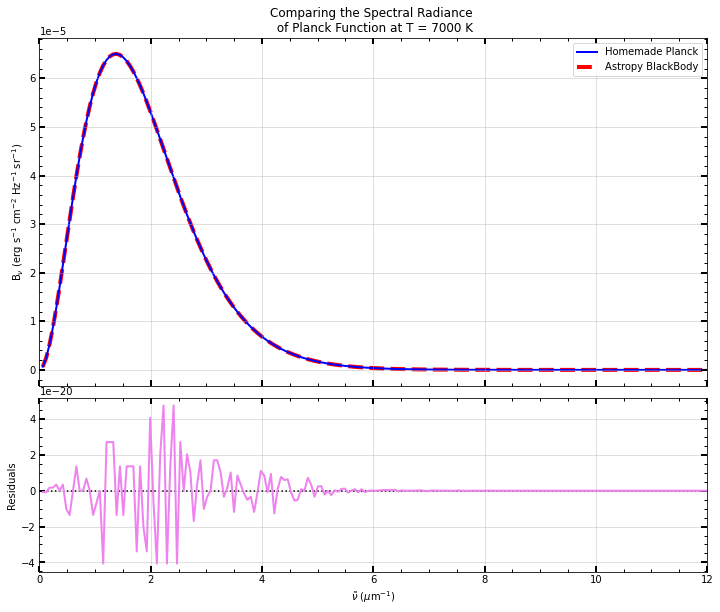

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,8), nrows = 2, ncols = 1, 
                               gridspec_kw={'height_ratios': [2, 1]},squeeze=True,sharex=True)

fig.tight_layout(h_pad=.2)
ax = ax1

T = 7000 * u.K

ax.minorticks_on()
ax.grid(True,alpha=.5)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_ylabel(r"B$_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$)")
ax.set_title("Comparing the Spectral Radiance \n of Planck Function at T = 7000 K")

ax.set_xlim([0,12])

pl7 = astro530.Planck(wn_1*u.um,T/u.K)
bb7 = BlackBody(T)(wn_1.to(u.cm, equivalencies=spectral())).decompose().to(pl7[-1].unit)
res = pl7 - bb7

ax.plot(wn_1,pl7,label="Homemade Planck",zorder=1,lw=2,ls="-",c='b')
ax.plot(wn_1,bb7,label="Astropy BlackBody",zorder = 0,lw=4,ls="--",c='r')

ax.legend()

ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax2.set_xlabel(r"$\tilde{\nu}~(\mu$m$^{-1}$)")
ax2.set_ylabel("Residuals")

ax2.plot([0,12],[0,0],c='k',ls=":")
ax2.plot(wn_1,res,c='violet',lw = 2)

fig.savefig('plots/HW1/comp_funct.pdf',bbox_inches='tight')

In [13]:
print(r"Machine Precision (ε) = ", np.finfo(float).eps)

Machine Precision (ε) =  2.220446049250313e-16


C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


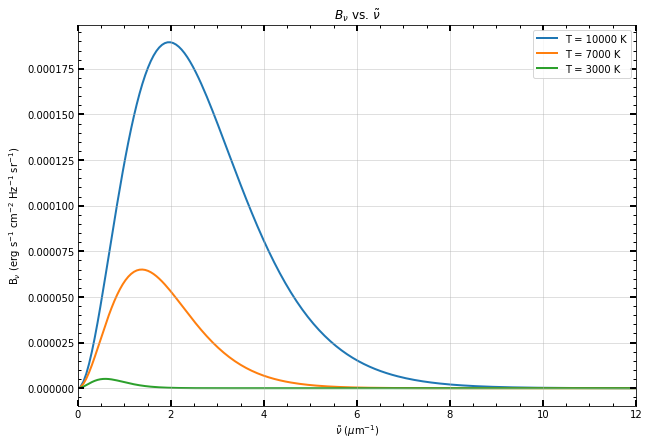

In [14]:
fig, axes = plt.subplots(figsize = (10,7),nrows=1, ncols=1)

ax = axes

for T in T_list:
    ax.plot(wn_1,astro530.Planck(wn_1*u.um,T/u.K),label="T = %.0f K"%(T.value),zorder=1,lw=2,ls="-")

ax.set_xlabel(r"$\tilde{\nu}~(\mu$m$^{-1}$)")
ax.set_ylabel(r"B$_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$)")

ax.minorticks_on()
ax.grid(True,alpha=.5)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_xlim([0,12])

ax.set_title(r"$B_{\nu}$ vs. $\tilde{\nu}$")
    
ax.legend()

fig.savefig('plots/HW1/linlin.pdf',bbox_inches='tight')

C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


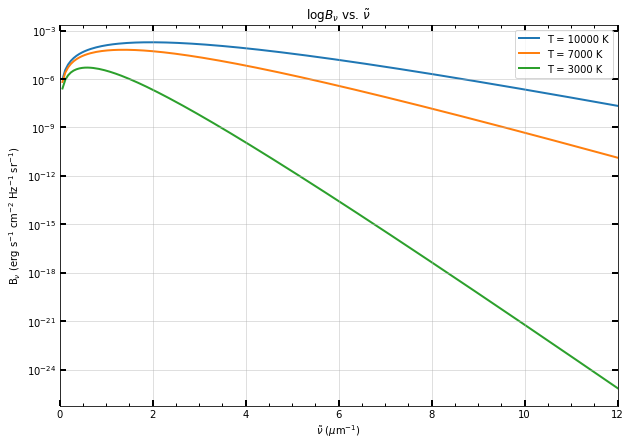

In [15]:
fig, axes = plt.subplots(figsize = (10,7),nrows=1, ncols=1)

ax = axes

for T in T_list:
    ax.plot(wn_2,astro530.Planck(wn_2*u.um,T/u.K),label="T = %.0f K"%(T.value),zorder=1,lw=2,ls="-")

ax.set_xlabel(r"$\tilde{\nu}~(\mu$m$^{-1}$)")
ax.set_ylabel(r"B$_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$)")
ax.set_yscale("log")

ax.minorticks_on()
ax.grid(True,alpha=.5)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_xlim([0,12])

ax.set_title(r"log$B_{\nu}$ vs. $\tilde{\nu}$")
    
ax.legend()

fig.savefig('plots/HW1/loglin.pdf',bbox_inches='tight')

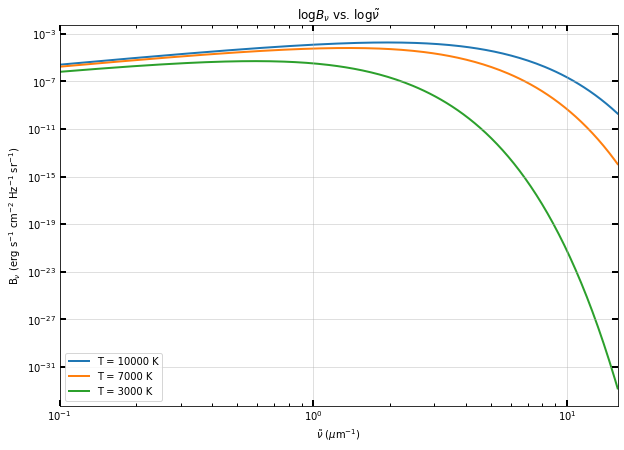

In [16]:
fig, axes = plt.subplots(figsize = (10,7),nrows=1, ncols=1)

ax = axes

for T in T_list:
    ax.plot(wn_3,astro530.Planck(wn_3*u.um,T/u.K),label="T = %.0f K"%(T.value),zorder=1,lw=2,ls="-")

ax.set_xlabel(r"$\tilde{\nu}~(\mu$m$^{-1}$)")
ax.set_ylabel(r"B$_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$)")
ax.set_yscale("log")
ax.set_xscale("log")

ax.minorticks_on()
ax.grid(True,alpha=.5)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_xlim([10**(-1),10**1.2])

ax.set_title(r"log$B_{\nu}$ vs. log$\tilde{\nu}$")
    
    
ax.legend()

fig.savefig('plots/HW1/loglog.pdf',bbox_inches='tight')

In [17]:
nu_list = np.linspace(0,12,25)/u.um
pf_list = astro530.Planck(nu_list*u.um,7000)
bb_list = BlackBody(7000*u.K)(nu_list.to(u.cm, equivalencies=spectral())).decompose().to(pf_list[-1].unit)

C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\astropy\units\equivalencies.py:129: RuntimeWarning: divide by zero encountered in true_divide
  (si.m, inv_m_spec, lambda x: 1.0 / x),


In [18]:
for i in range(len(nu_list)):
    pf="{:.3e}".format(pf_list[i].value)
    bb="{:.3e}".format(bb_list[i].value)
    res = "{:.3e}".format(pf_list[i].value-bb_list[i].value)
    #print(res)
    print(nu_list[i].value, "&", pf, "&", bb, "&", res, "??")

0.0 & nan & nan & nan ??
0.5 & 2.767e-05 & 2.767e-05 & 3.388e-21 ??
1.0 & 5.834e-05 & 5.834e-05 & -6.776e-21 ??
1.5 & 6.438e-05 & 6.438e-05 & -2.711e-20 ??
2.0 & 5.298e-05 & 5.298e-05 & 6.776e-21 ??
2.5 & 3.663e-05 & 3.663e-05 & 2.711e-20 ??
3.0 & 2.257e-05 & 2.257e-05 & -2.033e-20 ??
3.5 & 1.280e-05 & 1.280e-05 & -5.082e-21 ??
4.0 & 6.836e-06 & 6.836e-06 & 0.000e+00 ??
4.5 & 3.482e-06 & 3.482e-06 & -1.016e-20 ??
5.0 & 1.709e-06 & 1.709e-06 & 2.753e-21 ??
5.5 & 8.140e-07 & 8.140e-07 & -1.059e-22 ??
6.0 & 3.782e-07 & 3.782e-07 & -6.353e-22 ??
6.5 & 1.720e-07 & 1.720e-07 & -2.382e-22 ??
7.0 & 7.689e-08 & 7.689e-08 & -3.970e-23 ??
7.5 & 3.384e-08 & 3.384e-08 & 6.617e-24 ??
8.0 & 1.470e-08 & 1.470e-08 & 3.309e-24 ??
8.5 & 6.308e-09 & 6.308e-09 & -2.151e-23 ??
9.0 & 2.679e-09 & 2.679e-09 & -1.696e-23 ??
9.5 & 1.128e-09 & 1.128e-09 & 0.000e+00 ??
10.0 & 4.706e-10 & 4.706e-10 & 1.551e-24 ??
10.5 & 1.949e-10 & 1.949e-10 & -6.721e-25 ??
11.0 & 8.020e-11 & 8.020e-11 & 1.292e-26 ??
11.5 & 3.279e-